In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

In [22]:
X, y = make_circles(n_samples=1000, factor=0.5)
print(X.shape, Y.shape)

(1000, 2) (1000,)


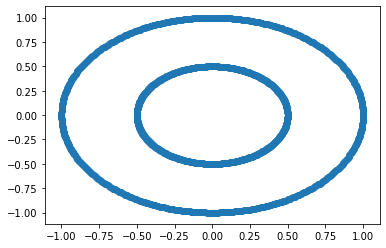

In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [24]:
# for ix in range(X.shape[0]):
#     if y[ix] == 0:
#         plt.scatter(X[ix, 0], X[ix, 1], color='red')
#     else:
#         plt.scatter(X[ix, 0], X[ix, 1], color='green')

# plt.show()

In [26]:
Y = np_utils.to_categorical(y)
print(Y.shape)

for ix in range(10):
    print(Y[ix], "---", y[ix])

(1000, 2)
[1. 0.] --- 0
[1. 0.] --- 0
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[0. 1.] --- 1


In [6]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print(X_train.shape)

(800, 2)


In [32]:
model = Sequential()

In [33]:
model.add(Dense(5,input_shape = (2,)))
model.add(Activation("relu"))

In [34]:
model.add(Dense(2))
model.add(Activation("softmax"))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 12        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [36]:
# model2 = Sequential()

# model2.add(Dense(2, input_shape=(2,)))
# for ix in range(5):
#     model2.add(Dense(5))
# model2.summary()

In [37]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
hist = model.fit(X_train, y_train, epochs=100,batch_size=100,verbose=2, shuffle=True ,validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 0s - loss: 0.3718 - acc: 0.9550 - val_loss: 0.3581 - val_acc: 0.9650
Epoch 2/100
 - 0s - loss: 0.3710 - acc: 0.9550 - val_loss: 0.3574 - val_acc: 0.9650
Epoch 3/100
 - 0s - loss: 0.3702 - acc: 0.9550 - val_loss: 0.3566 - val_acc: 0.9650
Epoch 4/100
 - 0s - loss: 0.3694 - acc: 0.9550 - val_loss: 0.3558 - val_acc: 0.9650
Epoch 5/100
 - 0s - loss: 0.3686 - acc: 0.9550 - val_loss: 0.3550 - val_acc: 0.9650
Epoch 6/100
 - 0s - loss: 0.3679 - acc: 0.9550 - val_loss: 0.3542 - val_acc: 0.9650
Epoch 7/100
 - 0s - loss: 0.3671 - acc: 0.9575 - val_loss: 0.3534 - val_acc: 0.9650
Epoch 8/100
 - 0s - loss: 0.3663 - acc: 0.9575 - val_loss: 0.3526 - val_acc: 0.9650
Epoch 9/100
 - 0s - loss: 0.3655 - acc: 0.9575 - val_loss: 0.3519 - val_acc: 0.9650
Epoch 10/100
 - 0s - loss: 0.3647 - acc: 0.9575 - val_loss: 0.3511 - val_acc: 0.9650
Epoch 11/100
 - 0s - loss: 0.3640 - acc: 0.9575 - val_loss: 0.3503 - val_acc: 0.9650
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.3045 - acc: 0.9850 - val_loss: 0.2916 - val_acc: 0.9950
Epoch 98/100
 - 0s - loss: 0.3039 - acc: 0.9850 - val_loss: 0.2910 - val_acc: 0.9950
Epoch 99/100
 - 0s - loss: 0.3033 - acc: 0.9850 - val_loss: 0.2904 - val_acc: 0.9950
Epoch 100/100
 - 0s - loss: 0.3027 - acc: 0.9850 - val_loss: 0.2898 - val_acc: 0.9950


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(X_train, y[:split])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
lr.score(X_test, y[split:])

0.58

In [15]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [16]:
data = hist.history
print(data)

{'val_loss': [0.6854774057865143, 0.6814866960048676, 0.6784690320491791, 0.675946444272995, 0.6737540662288666, 0.6717425882816315, 0.6698722243309021, 0.6681080460548401, 0.6664037108421326, 0.6647711396217346, 0.663178950548172, 0.6616312563419342, 0.6601293385028839, 0.658647209405899, 0.6572131216526031, 0.6558025181293488, 0.6544202268123627, 0.6530472338199615, 0.6517075896263123, 0.6504001021385193, 0.6491207182407379, 0.6478592455387115, 0.6466102004051208, 0.6453906297683716, 0.6441858112812042, 0.6429859399795532, 0.6417988538742065, 0.640631377696991, 0.6394750475883484, 0.6383350193500519, 0.6372000873088837, 0.6360828876495361, 0.6349705755710602, 0.6338702738285065, 0.6327796876430511, 0.6316927075386047, 0.6306366920471191, 0.6295902729034424, 0.6285454630851746, 0.6275049149990082, 0.6264721155166626, 0.6254554986953735, 0.6244431138038635, 0.6234350204467773, 0.6224301755428314, 0.6214273869991302, 0.6204298138618469, 0.6194387972354889, 0.6184384822845459, 0.61744326

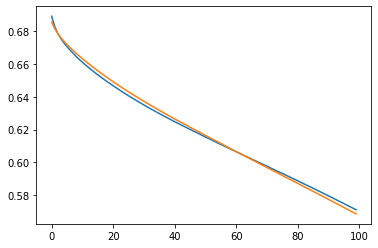

In [17]:
# plt.plot(data['loss'])
# plt.plot(data['val_loss'])
# plt.show()